In [1]:
import openai
import yaml
import wandb
import sys, os
import tiktoken

from IPython.display import Image

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.utils import *
from src.svg_quality_checks import *
from src.gpt_wrappers import *

# load yaml config
with open("../config.yml", "r") as f:
    config = yaml.safe_load(f)

openai.api_key = config["OPENAI_KEY"]
os.environ["OPENAI_API_KEY"] = config["OPENAI_KEY"]

In [2]:
from langchain.chat_models import ChatOpenAI
from langchain import OpenAI, ConversationChain, LLMChain

from langchain.chains import ConversationChain
from langchain.chat_models import ChatOpenAI
from langchain.memory import ConversationBufferMemory

from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    MessagesPlaceholder
)

encoder = tiktoken.encoding_for_model("gpt-3.5-turbo")

## Langchain - chain with HTML / React

In [3]:
from langchain.prompts import PromptTemplate
from langchain.chains import SimpleSequentialChain

FILENAME_INPUT = "segmented_buttons_short"
input_svg = load_raw_svg_optimize_clean_save_png(FILENAME_INPUT)

human_message_prompt = HumanMessagePromptTemplate(
        prompt=PromptTemplate(
            template="""This is an SVG with app bottom bar buttons:
                        {input_svg}
                        Turn it into React app with:
                        - same bottom bar buttons but all buttons have green color and text has red color.
                        Keep it as simple, short, optimized and clean as possible.
                        Start with import React ... and end with export...""",
            input_variables=["input_svg"],
        )
    )
chat_prompt_template = ChatPromptTemplate.from_messages([human_message_prompt])

second_prompt = PromptTemplate(
    input_variables=["input_react"],
    template="""This is an React app with  bottom bar buttons, all buttons have green color and text has red color:
                {input_react}
                Generate a complete valid XML with SVG from it.
                Add width and height in the <svg> tag.
                Keep it as short, optimized and clean as possible.
                Start with <svg ... and end with </svg>
            """
)


segmented_buttons_short_optimized.svg:
Done in 90 ms!
13.162 KiB - 70.3% = 3.909 KiB


In [4]:
llm = OpenAI(temperature=0.9, max_tokens=-1, model_name='text-davinci-003', request_timeout=120)

chain = LLMChain(llm=llm, prompt=chat_prompt_template)
chain_two = LLMChain(llm=llm, prompt=second_prompt)

overall_chain = SimpleSequentialChain(chains=[chain, chain_two], verbose=True)
final_anwer = overall_chain.run(input_svg)



> Entering new SimpleSequentialChain chain...


import React from "react";
import { StyleSheet, Text, View, Dimensions } from "react-native";

const svgWidth = 228;
const svgHeight = 48;
const strokeColor = "#79747e";

const AppBottomNav = () => {
  return (
    <View style={styles.container}>
      <View style={styles.frame}>
        <View style={[styles.frameBackground, styles.button]}>
          <Text style={styles.text}>Enabled</Text>
        </View>
        <View style={[styles.frameBackground, styles.button]}>
          <Text style={styles.text}>Enabled</Text>
        </View>
      </View>
    </View>
  );
};

const styles = StyleSheet.create({
  container: {
    position: "absolute",
    left: 0,
    bottom: 0,
    flexDirection: "row",
    alignItems: "flex-end",
  },
  frame: {
    width: svgWidth,
    height: svgHeight,
    flexDirection: "row",
    alignItems: "center",
    alignContent: "center",
    borderWidth: 2,
    borderColor: strokeColor,
  },
  frameBackground: {


Quality check: True (228.0, 48.0)


Can't handle color: 79747e



test_optimized.svg:
Done in 20 ms!
0.594 KiB - 10.7% = 0.53 KiB


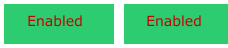

In [5]:
print("Quality check:", validate_svg(final_anwer), get_svg_size(final_anwer))
save_gpt_answer_as_svg_and_png(final_anwer, 'test')
Image(filename=f'../generated_data/test_optimized.png', width=400, height=300)

In [6]:
print(final_anwer)



<svg width="228" height="48">
  <rect width="228" height="48" stroke-width="2" fill="white" stroke="79747e"/>
  <rect x="4" y="4" width="110" height="40" rx="0" fill="#2ecc71"/>
  <text x="55" y="26" font-family="Roboto" font-style="normal" font-weight="500" font-size="14" fill="#bf0404" text-anchor="middle" alignment-baseline="middle">Enabled</text>
  <rect x="124" y="4" width="110" height="40" rx="0" fill="#2ecc71"/>
  <text x="174" y="26" font-family="Roboto" font-style="normal" font-weight="500" font-size="14" fill="#bf0404" text-anchor="middle" alignment-baseline="middle">Enabled</text>
</svg>
